In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

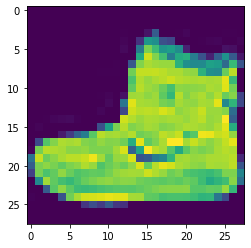

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print(X_train[0])
print(X_train[0].shape)
print(X_train.shape)
print(y_train.shape)

plt.imshow(X_train[0])

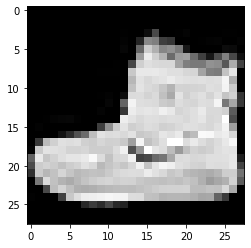

In [3]:
plt.imshow(X_train[0], cmap='gray')

In [4]:
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

In [5]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
# x축 데이터 스케일링
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [7]:
# y축 데이터 전처리 (예측값이면 1, 아니면 0)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [8]:
model = models.Sequential()

In [9]:
# Hidden Layer 2개. 
model.add(layers.Dense(100, activation='relu', input_shape=(W*H,))) #input_shape는 처음에만 넣음
model.add(layers.Dropout(0,5)) #50%... 절반 정도 끊겠다. 가지치겠다.(Pruning..overfitting 줄이기 위함.)
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0,25)) #25%
model.add(layers.Dense(10, activation='softmax'))

model.compile('sgd', 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)
model_eval = model.evaluate(X_test, Y_test, batch_size=100)
print('loss:{}, accuracy:{}'.format(*model_eval))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 24us/step - loss: 1.1238 - accuracy: 0.6556 - val_loss: 0.7169 - val_accuracy: 0.7630
Epoch 2/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.6516 - accuracy: 0.7857 - val_loss: 0.5901 - val_accuracy: 0.8017
Epoch 3/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.5644 - accuracy: 0.8098 - val_loss: 0.5366 - val_accuracy: 0.8152
Epoch 4/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.5199 - accuracy: 0.8232 - val_loss: 0.5070 - val_accuracy: 0.8262
Epoch 5/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.4930 - accuracy: 0.8309 - val_loss: 0.4845 - val_accuracy: 0.8287
Epoch 6/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.4745 - accuracy: 0.8361 - val_loss: 0.4719 - val_accuracy: 0.8351
Epoch 7/20
48000/48000 [==============================] - 1s 22us/s

In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'])
    plt.savefig('C:/kyh/eclipse/springWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload/Loss.png', dpi=300)
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'])
    plt.savefig('C:/kyh/eclipse/springWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload/Accuracy.png', dpi=300)
    
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.3746 - accuracy: 0.8699 - val_loss: 0.3965 - val_accuracy: 0.8608
Epoch 2/10
48000/48000 [==============================] - 1s 19us/step - loss: 0.3719 - accuracy: 0.8713 - val_loss: 0.4011 - val_accuracy: 0.8597
Epoch 3/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.3682 - accuracy: 0.8719 - val_loss: 0.3852 - val_accuracy: 0.8658
Epoch 4/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.3651 - accuracy: 0.8743 - val_loss: 0.3950 - val_accuracy: 0.8612
Epoch 5/10
48000/48000 [==============================] - 1s 23us/step - loss: 0.3622 - accuracy: 0.8742 - val_loss: 0.3931 - val_accuracy: 0.8643
Epoch 6/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.3587 - accuracy: 0.8761 - val_loss: 0.3807 - val_accuracy: 0.8694
Epoch 7/10
48000/48000 [==============================] - 1s 22us/st

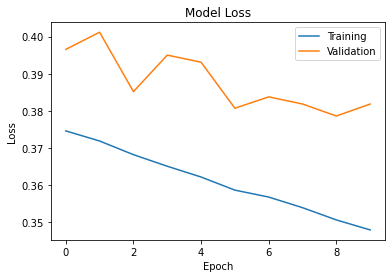

In [11]:
plot_loss(history)

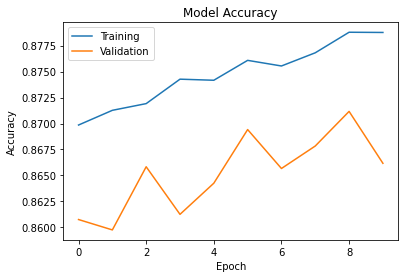

In [12]:
plot_acc(history)

### Image Data Plotting

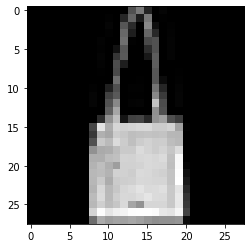

In [13]:
plt.imshow(X_train[200].reshape(W,H), cmap='gray')

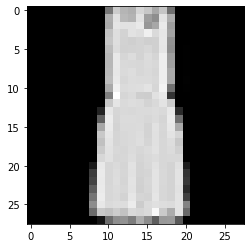

In [14]:
plt.imshow(X_train[30000].reshape(W,H), cmap='gray')

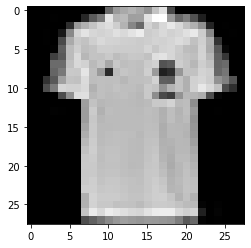

In [15]:
plt.imshow(X_train[2300].reshape(W,H), cmap='gray')

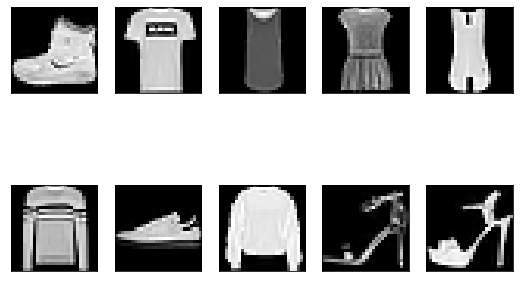

In [16]:
row = 2
col = 5

grid = range(10)
fig, axs = plt.subplots(nrows = row, ncols = col, figsize=(9,6),
           subplot_kw={'xticks':[ ],'yticks':[ ]})

for ax, index in zip(axs.flat, grid):
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
    
plt.show()